# Project One
## Flight Delay
### Mike & Emily & Nather & Milad

In [5]:
#Dependencies:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import linregress
import time
import json
import os
from pathlib import Path
import hvplot.pandas

#Files to load
airline_data_to_load = Path("Resources/airlines.csv")
airport_data_to_load = Path("Resources/airports.csv")
flights_data_to_load = Path("Resources/flights.csv")

#Read the data and store it in a Pandas dataframe
airline_data = pd.read_csv(airline_data_to_load)
airport_data = pd.read_csv(airport_data_to_load)
flights_data = pd.read_csv(flights_data_to_load)

#Clean the data to have same column names
airline_data.rename(columns={"AIRLINE": "AIRLINE_NAME"}, inplace=True)
airline_data.rename(columns={"IATA_CODE": "AIRLINE"}, inplace=True)
airport_data.rename(columns={"IATA_CODE": "ORIGIN_AIRPORT"}, inplace=True)

#Combine the data into a single dataframe
flight_data_complete = pd.merge(flights_data, airline_data, on="AIRLINE", how="left")
flight_data_complete = pd.merge(flight_data_complete, airport_data, on="ORIGIN_AIRPORT", how="left")
flight_data_complete

C:\Users\m1365\AppData\Local\Temp\ipykernel_11280\814940692.py:21: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_data = pd.read_csv(flights_data_to_load)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,NaN,NaN,US Airways Inc.,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,NaN,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,NaN,NaN,NaN,JetBlue Airways,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,NaN,NaN,NaN,JetBlue Airways,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,NaN,NaN,NaN,JetBlue Airways,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,NaN,NaN,NaN,JetBlue Airways,Orlando International Airport,Orlando,FL,USA,28.42889,-81.31603


In [6]:
#Clean the data and fill the missing values with 0
flight_data_cleaned=flight_data_complete.fillna("0")
flight_data_cleaned

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,0,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,0,US Airways Inc.,San Francisco International Airport,San Francisco,CA,USA,37.619,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,0,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,0,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,0,0,0,JetBlue Airways,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,0,0,0,JetBlue Airways,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,0,0,0,JetBlue Airways,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,0,0,0,JetBlue Airways,Orlando International Airport,Orlando,FL,USA,28.42889,-81.31603


In [7]:
#Check to insure there are no null values
null_count= flight_data_cleaned.isnull().sum()
null_count

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
AIRLINE_NAME           0
AIRPORT                0
CITY                   0
STATE                  0
COUNTRY                0
LATITUDE               0
LONGITUDE              0
dtype: int64

In [8]:
#What is the average delay time for each airline

#Create a new dataframe that contains the airline delays that are greater than zero
flight_data_cleaned['AIRLINE_DELAY'] = flight_data_cleaned['AIRLINE_DELAY'].astype(float)
flights_delayed_df = flight_data_cleaned.loc[flight_data_cleaned['AIRLINE_DELAY'] > 0]
flights_delayed_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
35,2015,1,1,4,HA,17,N389HA,LAS,HNL,145,...,15.0,0.0,0.0,Hawaiian Airlines Inc.,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233
52,2015,1,1,4,B6,2134,N307JB,SJU,MCO,400,...,85.0,0.0,0.0,JetBlue Airways,Luis Muñoz Marín International Airport,San Juan,PR,USA,18.43942,-66.00183
55,2015,1,1,4,B6,2276,N646JB,SJU,BDL,438,...,72.0,0.0,0.0,JetBlue Airways,Luis Muñoz Marín International Airport,San Juan,PR,USA,18.43942,-66.00183
73,2015,1,1,4,US,425,N174US,PDX,PHX,520,...,60.0,0.0,0.0,US Airways Inc.,Portland International Airport,Portland,OR,USA,45.58872,-122.5975
74,2015,1,1,4,AA,89,N3KVAA,IAH,MIA,520,...,54.0,0.0,0.0,American Airlines Inc.,George Bush Intercontinental Airport,Houston,TX,USA,29.98047,-95.33972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819023,2015,12,31,4,B6,1029,N328JB,MCO,BQN,2342,...,17.0,3.0,0.0,JetBlue Airways,Orlando International Airport,Orlando,FL,USA,28.42889,-81.31603
5819051,2015,12,31,4,AS,28,N477AS,SEA,MSP,2355,...,16.0,0.0,0.0,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
5819057,2015,12,31,4,NK,371,N661NK,FLL,BQN,2358,...,13.0,0.0,0.0,Spirit Air Lines,Fort Lauderdale-Hollywood International Airport,Ft. Lauderdale,FL,USA,26.07258,-80.15275
5819069,2015,12,31,4,B6,1248,N948JB,LAS,JFK,2359,...,159.0,0.0,0.0,JetBlue Airways,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233


In [9]:
#View all columns in the dataframe 

pd.set_option('display.max_columns', None)
print(flights_delayed_df)

         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
35       2015      1    1            4      HA             17      N389HA   
52       2015      1    1            4      B6           2134      N307JB   
55       2015      1    1            4      B6           2276      N646JB   
73       2015      1    1            4      US            425      N174US   
74       2015      1    1            4      AA             89      N3KVAA   
...       ...    ...  ...          ...     ...            ...         ...   
5819023  2015     12   31            4      B6           1029      N328JB   
5819051  2015     12   31            4      AS             28      N477AS   
5819057  2015     12   31            4      NK            371      N661NK   
5819069  2015     12   31            4      B6           1248      N948JB   
5819071  2015     12   31            4      B6            802      N589JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
35      

In [10]:
#How many total delays are there for each month of the year?

month_df=flights_delayed_df.groupby("MONTH")[["AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]].sum(numeric_only=True)
month_df

,AIRLINE_DELAY
MONTH,
1,1708155.0
2,1712660.0
3,1818680.0
4,1490594.0
5,1667920.0
6,2296333.0
7,2021379.0
8,1819598.0
9,1176791.0


In [11]:
#What are the types of delays?

delay_df= flights_delayed_df[["AIR_SYSTEM_DELAY", "SECURITY_DELAY",  "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]]
delay_df

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
35,0.0,0.0,15.0,0.0,0.0
52,0.0,0.0,85.0,0.0,0.0
55,17.0,0.0,72.0,0.0,0.0
73,0.0,0.0,60.0,0.0,0.0
74,0.0,0.0,54.0,0.0,0.0
...,...,...,...,...,...
5819023,0.0,0.0,17.0,3.0,0.0
5819051,12.0,0.0,16.0,0.0,0.0
5819057,15.0,0.0,13.0,0.0,0.0
5819069,0.0,0.0,159.0,0.0,0.0


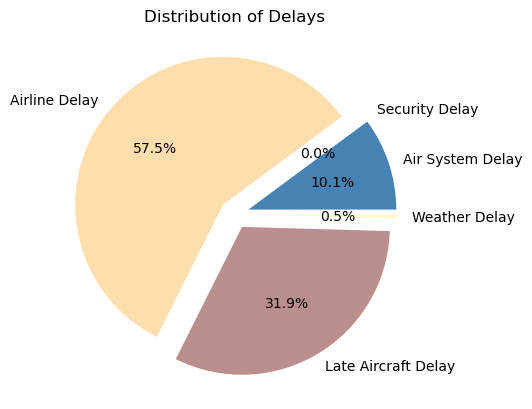

In [12]:
# Calculate the total sum of delays
total_delays = delay_df.sum()

# Create pie chart
labels = ["Air System Delay", "Security Delay", "Airline Delay", "Late Aircraft Delay", "Weather Delay"]
values = total_delays.values
colors = ["steelblue", "powderblue", "navajowhite", "rosybrown", "lemonchiffon"]
explode = [0.1, 0.1, 0.1, 0.1, 0.1] 
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode)
plt.title('Distribution of Delays')
plt.show()

In [13]:
airsystem_delay= delay_df["AIR_SYSTEM_DELAY"].sum()
airsystem_delay

3561228.0

In [14]:
#What is the average delay time for each airline

#Find the average delay time for each airline using groupby 
average_delay= flights_delayed_df.groupby(["AIRLINE"])["AIRLINE_DELAY"].mean()
average_delay_df=pd.DataFrame(average_delay)
average_df = average_delay_df.reset_index().sort_values(['AIRLINE_DELAY'],ascending=False)
average_df

,AIRLINE,AIRLINE_DELAY
9,OO,52.232550
4,EV,43.823536
3,DL,42.890144
1,AS,41.543107
0,AA,40.112940
7,MQ,38.736709
10,UA,33.550705
11,US,32.272760
5,F9,30.125033
12,VX,29.406074


Text(0, 0.5, 'Avg. delay in minutes')

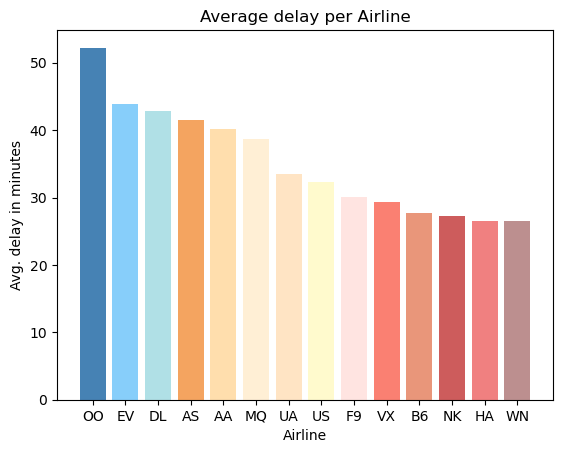

In [15]:
#Graph for average delay for each airline

colors = ["steelblue", "lightskyblue", "powderblue", "sandybrown", "navajowhite", "papayawhip", "bisque", "lemonchiffon", "mistyrose", "salmon", "darksalmon", "indianred", "lightcoral","rosybrown"]
plt.bar(average_df['AIRLINE'], average_df['AIRLINE_DELAY'], color=colors)
plt.title("Average delay per Airline")
plt.xlabel("Airline")
plt.ylabel("Avg. delay in minutes")

In [16]:
#Find the average delay of each origin airport

origin_delay= flights_delayed_df.groupby(["ORIGIN_AIRPORT"])["AIRLINE_DELAY"].mean()
origin_delay

ORIGIN_AIRPORT
10135     66.666667
10136     56.307692
10140     27.616071
10141     19.000000
10146     82.222222
            ...    
WRG       26.791667
WYS       64.500000
XNA       54.405210
YAK       14.600000
YUM      121.564103
Name: AIRLINE_DELAY, Length: 757, dtype: float64

In [17]:
origin_delay.describe()

count    757.000000
mean      54.339472
std       47.206636
min        1.000000
25%       29.947202
50%       41.759979
75%       64.464286
max      420.000000
Name: AIRLINE_DELAY, dtype: float64

In [18]:
#What origin airport has the highest amount of delayed flights

max_origin_delay = flights_delayed_df.groupby("ORIGIN_AIRPORT")["AIRLINE_DELAY"].max()
max_delay = max_origin_delay.max()
origin_airport_with_max_delay = max_origin_delay.idxmax()
print(f"The origin airport with the maximum delay is {origin_airport_with_max_delay} with a delay of {max_delay}")

The origin airport with the maximum delay is BHM with a delay of 1971.0


In [19]:
#Find the average delay of each destination airport

destination_delay= flights_delayed_df.groupby(["DESTINATION_AIRPORT"])["AIRLINE_DELAY"].mean()
destination_delay

DESTINATION_AIRPORT
10135    46.200000
10136    38.333333
10140    28.075949
10141    40.400000
10146    31.357143
           ...    
WRG      55.153846
WYS      43.250000
XNA      36.117493
YAK      13.538462
YUM      45.169643
Name: AIRLINE_DELAY, Length: 800, dtype: float64

In [20]:
#What destination airport has the highest amount of delayed flights

max_destination_delay = flights_delayed_df.groupby("DESTINATION_AIRPORT")["AIRLINE_DELAY"].max()
max_delay = max_origin_delay.max()
destination_airport_with_max_delay = max_destination_delay.idxmax()
print(f"The destination airport with the maximum delay is {destination_airport_with_max_delay} with a delay of {max_delay}")

The destination airport with the maximum delay is DFW with a delay of 1971.0


In [21]:
# convert data to numeric values

flight_data_cleaned['AIRLINE_DELAY'] = pd.to_numeric(flight_data_cleaned['AIRLINE_DELAY'], errors='coerce')
flight_data_cleaned['AIR_SYSTEM_DELAY'] = pd.to_numeric(flight_data_cleaned['AIR_SYSTEM_DELAY'], errors='coerce')
flight_data_cleaned['SECURITY_DELAY'] = pd.to_numeric(flight_data_cleaned['SECURITY_DELAY'], errors='coerce')
flight_data_cleaned['LATE_AIRCRAFT_DELAY'] = pd.to_numeric(flight_data_cleaned['LATE_AIRCRAFT_DELAY'], errors='coerce')
flight_data_cleaned['WEATHER_DELAY'] = pd.to_numeric(flight_data_cleaned['WEATHER_DELAY'], errors='coerce')

In [22]:
# crete new df where delay is > 0 
flights_all_delayed_df= flight_data_cleaned[(flight_data_cleaned['AIRLINE_DELAY'] > 1) |
                  (flight_data_cleaned['AIR_SYSTEM_DELAY'] > 1) |
                  (flight_data_cleaned['SECURITY_DELAY'] > 1) |
                  (flight_data_cleaned['LATE_AIRCRAFT_DELAY'] > 1) |
                  (flight_data_cleaned['WEATHER_DELAY'] > 1)]
flights_all_delayed_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,115,127.0,12.0,14.0,141.0,207.0,220.0,166.0,1487,527.0,40.0,542,607.0,25.0,0,0,0,25.0,0.0,0.0,0.0,0.0,Spirit Air Lines,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692
30,2015,1,1,4,NK,168,N629NK,PHX,ORD,125,237.0,72.0,9.0,246.0,204.0,175.0,156.0,1440,622.0,10.0,549,632.0,43.0,0,0,0,43.0,0.0,0.0,0.0,0.0,Spirit Air Lines,Phoenix Sky Harbor International Airport,Phoenix,AZ,USA,33.43417,-112.00806
35,2015,1,1,4,HA,17,N389HA,LAS,HNL,145,145.0,0.0,16.0,201.0,370.0,385.0,361.0,2762,602.0,8.0,555,610.0,15.0,0,0,0,0.0,0.0,15.0,0.0,0.0,Hawaiian Airlines Inc.,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233
50,2015,1,1,4,B6,1030,N239JB,BQN,MCO,307,304.0,-3.0,25.0,329.0,173.0,196.0,160.0,1129,509.0,11.0,500,520.0,20.0,0,0,0,20.0,0.0,0.0,0.0,0.0,JetBlue Airways,Rafael Hernández Airport,Aguadilla,PR,USA,18.49486,-67.12944
52,2015,1,1,4,B6,2134,N307JB,SJU,MCO,400,535.0,95.0,9.0,544.0,185.0,175.0,163.0,1189,727.0,3.0,605,730.0,85.0,0,0,0,0.0,0.0,85.0,0.0,0.0,JetBlue Airways,Luis Muñoz Marín International Airport,San Juan,PR,USA,18.43942,-66.00183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819023,2015,12,31,4,B6,1029,N328JB,MCO,BQN,2342,3.0,21.0,10.0,13.0,163.0,162.0,145.0,1129,338.0,7.0,325,345.0,20.0,0,0,0,0.0,0.0,17.0,3.0,0.0,JetBlue Airways,Orlando International Airport,Orlando,FL,USA,28.42889,-81.31603
5819051,2015,12,31,4,AS,28,N477AS,SEA,MSP,2355,11.0,16.0,10.0,21.0,192.0,204.0,189.0,1399,530.0,5.0,507,535.0,28.0,0,0,0,12.0,0.0,16.0,0.0,0.0,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
5819057,2015,12,31,4,NK,371,N661NK,FLL,BQN,2358,11.0,13.0,15.0,26.0,140.0,155.0,121.0,982,327.0,19.0,318,346.0,28.0,0,0,0,15.0,0.0,13.0,0.0,0.0,Spirit Air Lines,Fort Lauderdale-Hollywood International Airport,Ft. Lauderdale,FL,USA,26.07258,-80.15275
5819069,2015,12,31,4,B6,1248,N948JB,LAS,JFK,2359,238.0,159.0,34.0,312.0,282.0,282.0,243.0,2248,1015.0,5.0,741,1020.0,159.0,0,0,0,0.0,0.0,159.0,0.0,0.0,JetBlue Airways,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233


In [23]:
#What is the average delay time for each airport for each of the five delays

average_airline_delay= flights_all_delayed_df.groupby(["AIRPORT"])["AIRLINE_DELAY"].mean()
average_air_system_delay= flights_all_delayed_df.groupby(["AIRPORT"])['AIR_SYSTEM_DELAY'].mean()
average_security_delay= flights_all_delayed_df.groupby(["AIRPORT"])["SECURITY_DELAY"].mean()
average_late_airline_delay= flights_all_delayed_df.groupby(["AIRPORT"])["LATE_AIRCRAFT_DELAY"].mean()
average_weather_delay= flights_all_delayed_df.groupby(["AIRPORT"])["WEATHER_DELAY"].mean()

In [24]:
flights_delay_averages = pd.DataFrame({
                                    "Airline Delay AVG": average_airline_delay,
                                    "Air System Delay AVG": average_air_system_delay,
                                    "Security Delay AVG": average_security_delay,
                                    "Late Aircraft Delay AVG": average_late_airline_delay,
                                    "Weather Delay AVG": average_weather_delay
})

In [25]:
# Create a df for the sum of the delays by each individual airport

delay_sums = flights_delay_averages.groupby('AIRPORT')[['Airline Delay AVG', 'Air System Delay AVG', 'Security Delay AVG', 'Late Aircraft Delay AVG', 'Weather Delay AVG']].sum()
delay_sums['TOTAL DELAYS (minutes)'] = delay_sums[['Airline Delay AVG', 'Air System Delay AVG', 'Security Delay AVG', 'Late Aircraft Delay AVG', 'Weather Delay AVG']].sum(axis=1)
delay_sums_df = pd.DataFrame(delay_sums ['TOTAL DELAYS (minutes)'])
delay_sums_df

,TOTAL DELAYS (minutes)
AIRPORT,
0,55.181178
Aberdeen Regional Airport,78.385246
Abilene Regional Airport,69.368715
Abraham Lincoln Capital Airport,82.785185
Adak Airport,35.297297
...,...
Yakutat Airport,50.478873
Yampa Valley Airport (Yampa Valley Regional),74.668790
Yeager Airport,65.941509


In [26]:
delay_sums_df.sort_values(by = "TOTAL DELAYS (minutes)", axis=0,ascending=False).head(5)

,TOTAL DELAYS (minutes)
AIRPORT,
Valdez Airport,190.428571
Delta County Airport,117.384615
Barnstable Municipal Airport,113.125000
Greater Binghamton Airport,105.025000
Bert Mooney Airport,101.285714


## WEATHER DELAY about each airport

In [31]:
weather_delay_by_airline = flights_delayed_df.groupby(['AIRLINE', 'MONTH'])['WEATHER_DELAY'].sum()
# Print the weather delay for each airline per month
for (airline, month), delay in weather_delay_by_airline.items():
    print(f"Airline: {airline}, Month: {month}, Weather Delay: {delay}")

Airline: AA, Month: 1, Weather Delay: 2910.0
Airline: AA, Month: 2, Weather Delay: 1940.0
Airline: AA, Month: 3, Weather Delay: 1020.0
Airline: AA, Month: 4, Weather Delay: 1777.0
Airline: AA, Month: 5, Weather Delay: 1175.0
Airline: AA, Month: 6, Weather Delay: 1520.0
Airline: AA, Month: 7, Weather Delay: 1703.0
Airline: AA, Month: 8, Weather Delay: 1807.0
Airline: AA, Month: 9, Weather Delay: 1280.0
Airline: AA, Month: 10, Weather Delay: 777.0
Airline: AA, Month: 11, Weather Delay: 895.0
Airline: AA, Month: 12, Weather Delay: 1374.0
Airline: AS, Month: 1, Weather Delay: 0.0
Airline: AS, Month: 2, Weather Delay: 0.0
Airline: AS, Month: 3, Weather Delay: 0.0
Airline: AS, Month: 4, Weather Delay: 0.0
Airline: AS, Month: 5, Weather Delay: 0.0
Airline: AS, Month: 6, Weather Delay: 0.0
Airline: AS, Month: 7, Weather Delay: 0.0
Airline: AS, Month: 8, Weather Delay: 0.0
Airline: AS, Month: 9, Weather Delay: 0.0
Airline: AS, Month: 10, Weather Delay: 0.0
Airline: AS, Month: 11, Weather Delay:

In [27]:
weather_delay_by_airport = flights_delayed_df.groupby('ORIGIN_AIRPORT')['WEATHER_DELAY'].sum()
print(weather_delay_by_airport)

ORIGIN_AIRPORT
10135       0.0
10136       0.0
10140       0.0
10141       0.0
10146       0.0
          ...  
WRG         0.0
WYS         0.0
XNA      1360.0
YAK         0.0
YUM         0.0
Name: WEATHER_DELAY, Length: 757, dtype: object


In [ ]:
#Find the coordinates for the best and worst airports

# == airport intials then return the lat and long 
# then using those coordinates, make a map 
#need to use a zip and maybe an empty list 